# Introduction
This blog will utilize neural networks, and data collected by Spotify, to determine the genre of a given song. Below we will create three neural networks with Torch and attempt to train them.

This project is currently a work in progress

In [20]:
import pandas as pd

url = "https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/datasets/tcc_ceds_music.csv"
df = pd.read_csv(url)

In [21]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [22]:
engineered_features = ['dating', 'violence', 'world/life', 'night/time','shake the audience','family/gospel', 'romantic', 'communication','obscene', 'music', 'movement/places', 'light/visual perceptions','family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability','loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']      


Lets look at our different type of genres that we have!

In [23]:
df.groupby("genre").size()

genre
blues      4604
country    5445
hip hop     904
jazz       3845
pop        7042
reggae     2498
rock       4034
dtype: int64

Lets change reclassify 

In [24]:

genres = {
    "blues"     : 0,
    "country"   : 1,
    "hip hop"   : 2,
    "jazz"      : 3,
    "pop"       : 4,
    "reggae"    : 5,
    "rock"      : 6
}
df = df[df["genre"].apply(lambda x: x in genres.keys())]
df["genre"] = df["genre"].apply(genres.get) 

Now that we have relabeled all of our categories lets ensure that they have all been converted to integer values

In [26]:
df.groupby("genre").size()

genre
0    4604
1    5445
2     904
3    3845
4    7042
5    2498
6    4034
dtype: int64

Now let's calculate our base-rate 

In [28]:
df.groupby("genre").size() / len(df)

genre
0    0.162273
1    0.191915
2    0.031862
3    0.135521
4    0.248202
5    0.088045
6    0.142182
dtype: float64

If we were to guess category 4 (pop) we would be right about 24.8% of the time so this our base-rate. 

Lets utilize engineered_features 

In [51]:
from torch import nn
from matplotlib import pyplot as plt
import numpy as np 

In [56]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
class LyricsFromDF(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __getitem__(self, index):
        return self.df.iloc[index, 1], self.df.iloc[index, 0]
    
    def __len__(self):
        return len(self.df)


In [61]:
df_train, df_val = train_test_split(df,shuffle = True, test_size = 0.2)
train_data = LyricsFromDF(df_train)
val_data   = LyricsFromDF(df_val)

train_data[1000]

('randy rogers band', 34490)

In [69]:

!pipinstall torchtext

tokenizer = get_tokenizer('basic_english')

tokenized = tokenizer(train_data[194][0])
tokenized

/usr/bin/bash: line 1: pipinstall: command not found


NameError: name 'get_tokenizer' is not defined

In [ ]:
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, max_len, num_class)

In [ ]:


class EngineeredNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()

In [ ]:
import time 

def train(dataloader):
    epoch_start_time = time.time()

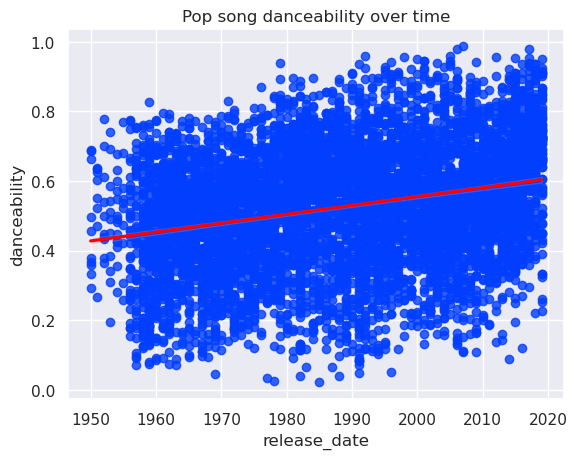

In [54]:
from matplotlib import pyplot as plt
pop_df = df[df['genre'] == 4]

import seaborn as sns
sns.set_theme(palette="bright")

ax = sns.regplot(data=pop_df, y="danceability", x="release_date", line_kws={"color": "red"})

# Set the title
ax.set_title("Pop song danceability over time")

# Show the plot
plt.show()

In [ ]:
from matplotlib import pyplot as plt
pop_df = df[df['genre'] == 4]

import seaborn as sns
sns.set_theme(palette="bright")

ax = sns.regplot(data=pop_df, x="danceability", y="release_date", line_kws={"color": "red"})

# Set the title
ax.set_title("Pop song danceability over time")

# Show the plot
plt.show()

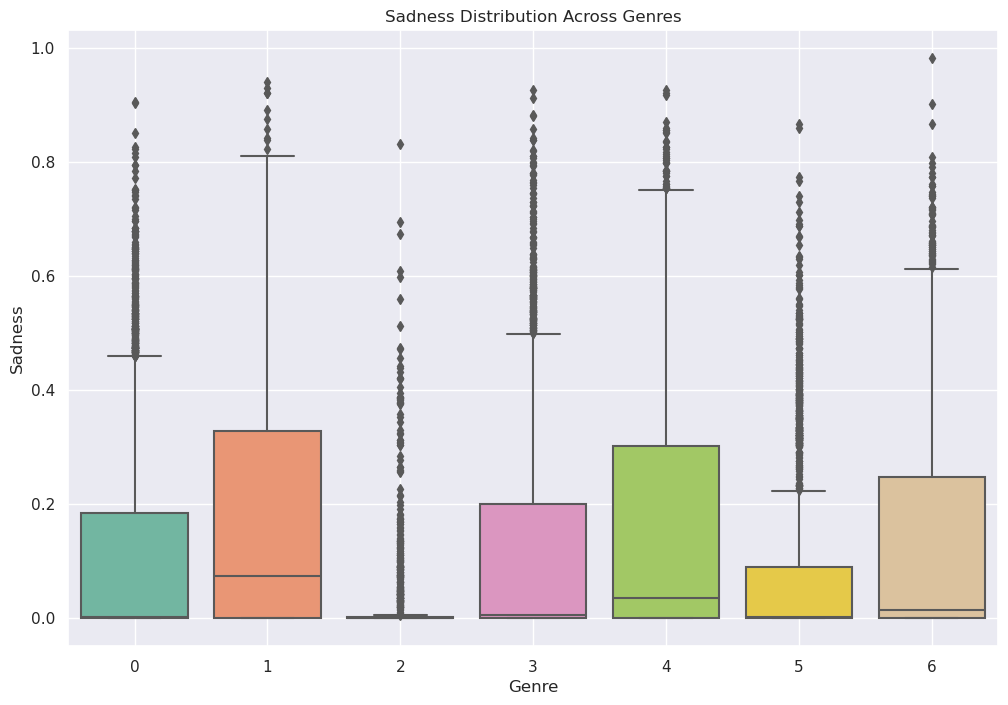

In [50]:
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_theme(palette="bright")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='genre', y='sadness', palette='Set2')
plt.title('Sadness Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Sadness')
#plt.xticks(rotation=10)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()